# Best movie Category based on Rating and Number of votes

## Introduction
In this Index you will find why is important to look at the movies categories with the best rating and the most votes
## Why is this data relevant?
* Is important because depends in how much rating and number of votes you can see wich category is more succesful
* With this we can assume wich category is most relevant on these days


![oscar.gif](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExYzQ5MjkxZjg5NjM3NjBiYjE1ZjQ4ZjA4NmFmOTM4NmYyYTljYTE3YyZjdD1n/V1fKEA5ojhDxiB7j9T/giphy.gif)

# SQL Code

In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
conn = sqlite3.connect('data/im.db')

Here we can see the *average rating* of the *category* with the highest *number of votes*.

The main reason to filter this way is to show that not always the best rated categories are the one who have more votes

In [13]:
pd.read_sql("""
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 900000 AND movie_ratings.averagerating >= 8.1
  GROUP BY movie_basics.genres 
  ORDER BY Rating  DESC  ;
""", conn)

,Category,Rating,NumberVotes
0,"Adventure,Drama,Sci-Fi",8.6,1299334
1,"Drama,Western",8.4,1211405
2,"Action,Thriller",8.4,1387769
3,"Biography,Crime,Drama",8.2,1035358
4,"Mystery,Thriller",8.1,1005960
5,"Action,Adventure,Sci-Fi",8.1,1183655
6,"Action,Adventure,Comedy",8.1,948394


# Graphic with Matplotib

In this graphic we can see that the best rating category is not the one that have the most votes.With that in mind we need to hear more to the audience to see what is the best option

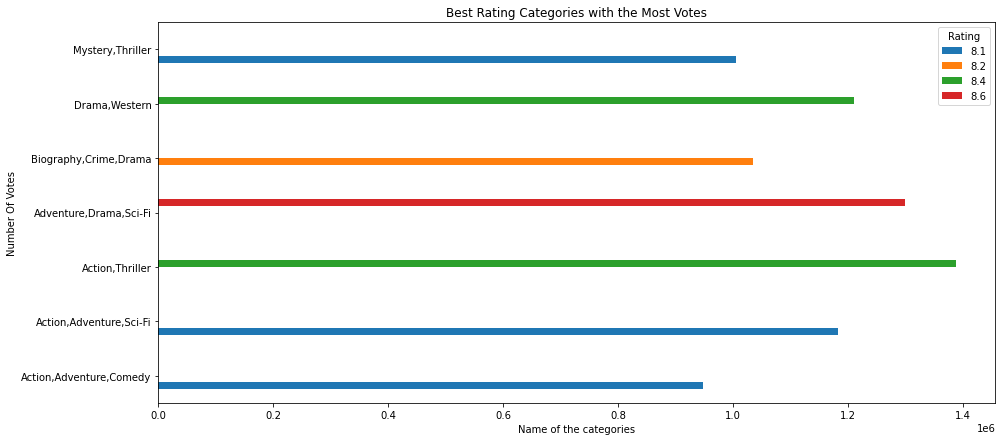

In [34]:
q= """
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 900000 AND movie_ratings.averagerating >= 8.1
  GROUP BY movie_basics.genres 
  ORDER BY Rating  DESC
;
"""
df=pd.read_sql(q, conn)
df.pivot(index='Category',columns='Rating',values='NumberVotes').plot(kind='barh',figsize=(15,7))
plt.xlabel('Name of the categories')
plt.ylabel('Number Of Votes')
plt.title('Best Rating Categories with the Most Votes')
plt.show()


# Graphic with Seaborn

This graphic represent the most rated categories with the most votes

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

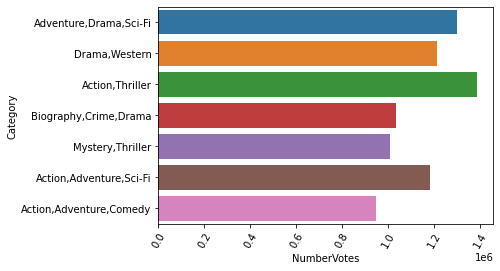

In [39]:
sns.barplot(data=df, x="NumberVotes", y="Category")
plt.xticks(rotation=60)

This graphic represent the best rating categories

<AxesSubplot:xlabel='Rating', ylabel='Category'>

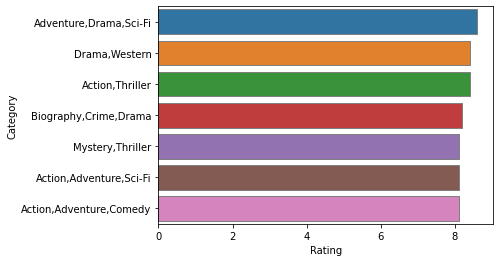

In [16]:
sns.barplot(
    data=df, x="Rating", y="Category", capsize=.4, errcolor=".5",
    linewidth=1, edgecolor=".5"
)

# Explanation

## Graphics Explanation
* The first one is about the average votes each category have, but what this mean? Well this mean that for every category the sume of each movie are the total votes per category and we can see that the category with the most votes are Action,Thriller.
* The second one is about the rating per category as we can se the best rating category is Action,Adventura,Sci-Fi.

## Quick Summary

The main value here is the number of votes because this votes are provideD by the community and the rating are provided by movie critics or people that is related with producers and movies

# But what if we only need one category?

![scream.gif](https://media.giphy.com/media/o1ncFNtD5eDUk/giphy.gif)

We already have the most voted categories so now with that in mind what are the most relevant in this final filter? Well here is the answer!

# SQL Code

First we need to filter the data between 900000 votes (the main reason we use this value is because the highest number of votes are 1800000) and with a movie average of 8.1

In [17]:
df4=pd.read_sql("""
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 900000 AND movie_ratings.averagerating >= 8.1
""", conn)
df4

,Category,Rating
0,"Mystery,Thriller",8.1
1,"Action,Thriller",8.4
2,"Adventure,Drama,Sci-Fi",8.6
3,"Action,Adventure,Comedy",8.1
4,"Drama,Western",8.4
5,"Biography,Crime,Drama",8.2
6,"Action,Adventure,Sci-Fi",8.1
7,"Action,Adventure,Sci-Fi",8.8


# DataFrame

In [18]:
genres_cols = df4['Category'].str.split(',',expand=True)
genres_cols.columns = ['genre1','genre2','genre3']
counts1=genres_cols['genre1'].value_counts()
counts2=genres_cols['genre2'].value_counts()
counts3=genres_cols['genre3'].value_counts()
total_counts = counts1.add(counts2, fill_value=0).add(counts3, fill_value=0)
one_category = total_counts.sort_values(ascending=False)
one_category.index
dfone=pd.DataFrame(list(zip(one_category.values, one_category.index)), columns = ["Frequency", "Category"])
dfone.head(5)

,Frequency,Category
0,4.0,Adventure
1,4.0,Action
2,3.0,Sci-Fi
3,3.0,Drama
4,2.0,Thriller


# Graphic

This graphic represent the best categories!

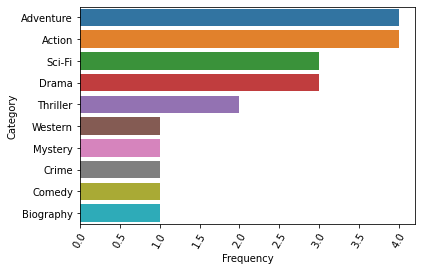

In [37]:
sns.barplot(data=dfone, x="Frequency", y="Category")
plt.xticks(rotation=60)

# Now how many possible category combinations we can use to make a movie?

![movie.gif](https://media.giphy.com/media/UDjF1zMreMld6/giphy.gif)

Here I make a simple function to show how many possible combinations you can have with 2 genres o 3 genres!

In [20]:
def combinations(m,n):
    if m<n:
        return 0
    else:
        comb=math.factorial(m)/(math.factorial(n) * math.factorial(m-n))
        return comb
print("Number of possible combinations of categorie movies with 2 genres : ",combinations(16,2))

Number of possible combinations of categorie movies with 2 genres :  120.0


In [10]:
#Combinaning Diferrent Categories only with 2 genders in a random way
movie_genres=["Adventure","Action","SciFi","Drama","Thriller"]
random.sample(movie_genres,2)

['Adventure', 'Drama']

In [11]:
def combinations1(m,n):
    if m<n:
        return 0
    else:
        comb=math.factorial(m)/(math.factorial(n) * math.factorial(m-n))
        return comb
print("Number of possible combinations of categorie movies with 3 genres: ",combinations1(16,3))


Number of possible combinations of categorie movies with 3 genres:  560.0


In [8]:
#Combinaning Diferrent Categories only with 3 genders in a random way
movie_genres1=["Adventure","Action","SciFi","Drama","Thriller"]
random.sample(movie_genres1,3)

['Action', 'Thriller', 'Adventure']

# Summary/Recommendation
* The best rating category probably wont be the one with the most votes. We think the category that could have more impact will be Action,Thriller because they have the most votes.
* Now if you only want one category the best category to make a movie will be Adventure or Action and the main reason is because they have the best raiting and the most votes! With that in mind you can make a succesful movie with popular categories

# Extra activities


# Working with my team-mate Miguel Cruz

I just helped my team-mate Miguel Cruz in the part of the query and the part of making his graphic of the query
Code of the graphic:
df=pd.read_sql(Director, conn)
df.pivot(index='primary_title',columns='averagerating',values='averagerating').plot(kind='bar',figsize=(15,8))
plt.figure(figsize=(15,8))
plt.bar('primary_title', 'averagerating',data=df)
plt.xlabel("Movie Title", size=15)
plt.ylabel('Average Rating', size=15)
plt.title("Director's movies", size=15)
plt.show()

In [ ]:
pd.read_sql("""
SELECT directors.person_id AS DirectorName,directors.movie_id AS IDM,movie_basics.movie_id,movie_basics.primary_title AS namemovie 
  FROM directors
  INNER JOIN movie_basics ON directors.movie_id = movie_basics.movie_id
  WHERE directors.person_id ='nm0751577'
  GROUP BY namemovie

  ;
""", conn)

In [ ]:
pd.read_sql("""
SELECT *
  FROM movie_basics
  WHERE primary_title = "Cherry"

  ;
""", conn)

In [ ]:
pd.read_sql("""
SELECT *
  FROM movie_ratings
  WHERE movie_id = 'tt9130508'
  ;
""", conn)

In [ ]:
avg_rating = """
SELECT person_id , primary_name as Director , COUNT(DISTINCT directors.movie_id) as "MoviesMade",  sum(movie_ratings.averagerating) / COUNT(movie_ratings.averagerating) as "Average Rating"
, movie_ratings.numvotes as numvotes
FROM persons
JOIN directors 
  USING (person_id)
JOIN movie_basics
  USING (movie_id)
JOIN movie_ratings
  USING (movie_id)
GROUP BY person_id 
HAVING "Movies Made" >= 5 AND "Average Rating" >= 8 AND numvotes >= 20000
ORDER BY "Average Rating" DESC

;
"""
pd.read_sql(avg_rating, conn)



# Working with a person outside of our team, I helped Juan Varguez 

The main activity making his query and how he can solved the problem
of the query he was assigned to. The query only requires extra information like the use of the WHERE LIKE %example
Also just helped with problems on the Kernel that only was to activate the learn-env